In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Pandas (for DataFrames)
import pandas as pd

# To save Pandas DataFrames as images
import dataframe_image as dfi

# For plots
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
## Show column definitions for Measurement table
# display(Measurement.__table__.columns.items())

# print('\nEasier to read:')
display([col[1] for col in Measurement.__table__.columns.items()])

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [4]:
## Show column definitions for Station table
# display(Station.__table__.columns.items())

# print('\nEasier to read:')
display([col[1] for col in Station.__table__.columns.items()])

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temps_06_june = (
    session.query(
        Measurement.date,
        Measurement.tobs
    )
    .filter(extract('month', Measurement.date) == 6)
    .all()
)

temps_06_june

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
#  3. Convert the June temperatures to a list.
temps_06_june_list = [tobs for date, tobs in temps_06_june]

temps_06_june_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_temps_06_june = pd.DataFrame(temps_06_june_list, columns=['June Temps'])

df_temps_06_june.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_temps_06_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temps_12_december = (
    session.query(
        Measurement.date,
        Measurement.tobs
    )
    .filter(extract('month', Measurement.date) == 12)
    .all()
)

temps_12_december

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [11]:
# 7. Convert the December temperatures to a list.
temps_12_december_list = [tobs for date, tobs in temps_12_december]

temps_12_december_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_temps_12_december = pd.DataFrame(temps_12_december_list, columns=['December Temps'])

df_temps_12_december.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_temps_12_december.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Analysis

In [14]:
# Define a lambda function to round series values to the nearest multiple of `mult`
mult = 5
round_mult = lambda x: mult * round(x/mult)

In [15]:
df_temps_06_june['June Temps'].map(round_mult)

0       80
1       75
2       80
3       75
4       75
        ..
1695    80
1696    75
1697    75
1698    75
1699    75
Name: June Temps, Length: 1700, dtype: int64

In [16]:
df_temps_12_december['December Temps'].map(round_mult)

0       75
1       75
2       75
3       65
4       65
        ..
1512    70
1513    70
1514    70
1515    65
1516    65
Name: December Temps, Length: 1517, dtype: int64

In [17]:
# Define function to make bins lists for plotting temperature data
def make_bins(ser):
    proto_bins = []

    for temp in ser:
        if temp not in proto_bins:
            proto_bins.append(temp)

    return sorted(proto_bins)

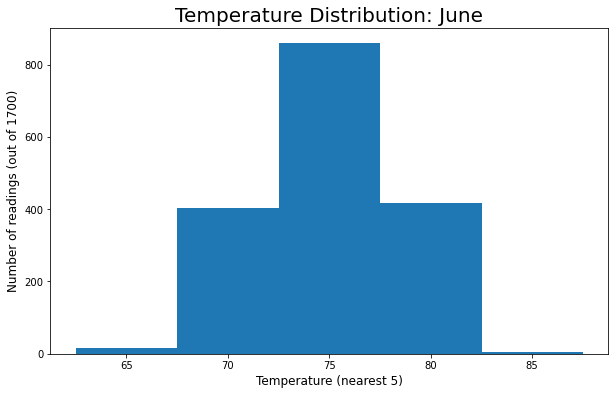

In [18]:
# Histogram for June temperatures
the_values = df_temps_06_june['June Temps'].map(round_mult)
the_bins = make_bins(the_values)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Temperature Distribution: June', fontsize=20)
ax.set_xlabel('Temperature (nearest 5)', fontsize=12)
ax.set_ylabel(f'Number of readings (out of {the_values.count()})', fontsize=12)
ax.set_xticks(the_bins)

ax.hist(
    the_values,
    bins=len(the_bins),
    range=(min(the_bins)-mult/2,max(the_bins)+mult/2)
)

plt.savefig('./analysis/hist_06_june.png', bbox_inches='tight')

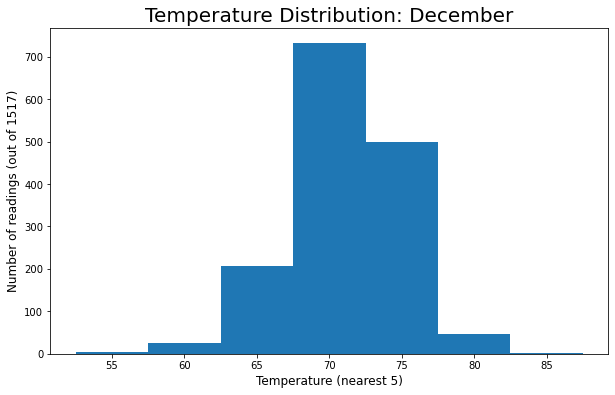

In [19]:
# Histogram for December temperatures
the_values = df_temps_12_december['December Temps'].map(round_mult)
the_bins = make_bins(the_values)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Temperature Distribution: December', fontsize=20)
ax.set_xlabel('Temperature (nearest 5)', fontsize=12)
ax.set_ylabel(f'Number of readings (out of {the_values.count()})', fontsize=12)
ax.set_xticks(the_bins)

ax.hist(
    the_values,
    bins=len(the_bins),
    range=(min(the_bins)-mult/2,max(the_bins)+mult/2)
)

plt.savefig('./analysis/hist_12_december.png', bbox_inches='tight')

In [20]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
precipitation_06_june = (
    session.query(
        Measurement.date,
        Measurement.prcp
    )
    .filter(extract('month', Measurement.date) == 6)
    .all()
)

precipitation_06_june

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [21]:
# Convert the June precipitation to a list.
precipitation_06_june_list = [tobs for date, tobs in precipitation_06_june]

precipitation_06_june_list

[0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.56,
 0.89,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.06,
 0.07,
 None,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.02,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.15,
 0.01,
 0.0,
 0.05,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.37,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.12,
 0.04,
 0.02,
 0.35,
 0.03,
 0.01,
 0.0,
 0.0,
 0.03,
 0.01,
 0.0,
 0.66,
 0.01,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.03,
 0.15,
 0.01,
 0.07,
 0.01,
 0.01,
 0.19,
 0.0,
 0.05,
 0.06,
 0.04,
 0.0,
 0.01,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [22]:
# Create a DataFrame from the list of precipitation for the month of June. 
df_precipitation_06_june = pd.DataFrame(precipitation_06_june_list, columns=['June Precipitation'])

df_precipitation_06_june.head()

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [23]:
# Calculate and print out the summary statistics for the June precipitation DataFrame.
df_precipitation_06_june.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [24]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
precipitation_12_december = (
    session.query(
        Measurement.date,
        Measurement.prcp
    )
    .filter(extract('month', Measurement.date) == 12)
    .all()
)

precipitation_12_december

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [25]:
# Convert the December precipitation to a list.
precipitation_12_december_list = [tobs for date, tobs in precipitation_12_december]

precipitation_12_december_list

[0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.58,
 0.77,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4,
 0.0,
 0.0,
 None,
 0.13,
 0.55,
 0.06,
 0.01,
 0.0,
 0.03,
 0.08,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13,
 0.07,
 0.07,
 0.08,
 0.4,
 0.7,
 0.0,
 0.01,
 0.07,
 0.02,
 0.15,
 0.02,
 0.18,
 0.03,
 0.04,
 0.1,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.2,
 0.01,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 0.09,
 0.01,
 0.02,
 0.02,
 0.12,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 2.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 1.1,
 0.02,
 0.0,
 0.16,
 0.09,
 0.02,
 0.0,
 0.0,
 0.05,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.15,
 0.09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.01,
 0.0,
 0.03,
 0.02,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.93,
 0.04,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.06,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [26]:
# Create a DataFrame from the list of precipitation for the month of December. 
df_precipitation_12_december = pd.DataFrame(precipitation_12_december_list, columns=['December Precipitation'])

df_precipitation_12_december.head()

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


In [27]:
# Calculate and print out the summary statistics for the December precipitation DataFrame.
df_precipitation_12_december.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [28]:
# Combine temperature summaries into one DataFrame
df_temps_combined_summary = df_temps_06_june.describe()\
    .merge(df_temps_12_december.describe(), left_index=True, right_index=True)

df_temps_combined_summary

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [29]:
# Combine precipitation summaries into one DataFrame
df_precipitation_combined_summary = df_precipitation_06_june.describe()\
    .merge(df_precipitation_12_december.describe(), left_index=True, right_index=True)

df_precipitation_combined_summary

,June Precipitation,December Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


In [30]:
# Save the summary statistics DataFrames as PNGs
dfi.export(df_temps_06_june.describe(),'./analysis/temps_06_june.png')
dfi.export(df_temps_12_december.describe(),'./analysis/temps_12_december.png')
dfi.export(df_temps_combined_summary,'./analysis/temps_combined_summary.png')
dfi.export(df_precipitation_06_june.describe(),'./analysis/precipitation_06_june.png')
dfi.export(df_precipitation_12_december.describe(),'./analysis/precipitation_12_december.png')
dfi.export(df_precipitation_combined_summary,'./analysis/precipitation_combined_summary.png')